In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score


In [6]:
import os

target_dir = "ml_group_project_fall_2025"
max_depth = 10
current_path = os.path.abspath(os.getcwd())
start_path = current_path
for i in range(max_depth):
    current_dir_name = os.path.basename(current_path)
    if current_dir_name == target_dir:
        os.chdir(current_path)
        break
    parent_path = os.path.dirname(current_path)
    current_path = parent_path


data = pd.read_csv('data/data.csv')

numericCols = [
    'Food_Insecurity_Rate', 'Num_Food_Insecure_Persons', 'Low_Threshold_State',
    'High_Threshold_State', 'Pct_FI_Below_Low_Threshold', 'Pct_FI_Between_Thresholds',
    'Pct_FI_Above_High_Threshold', 'Child_Food_Insecurity_Rate',
    'Num_Food_Insecure_Children', 'Pct_FI_Children_Below_185FPL',
    'Pct_FI_Children_Above_185FPL', 'MEDIAN_HOUSEHOLD_INCOME', 'POP_POVERTY_DETERMINED',
    'POP_BELOW_POVERTY', 'POP_16_PLUS', 'POP_UNEMPLOYED', 'HOUSEHOLDS_TOTAL',
    'HOUSEHOLDS_SNAP', 'POVERTY_RATE', 'UNEMPLOYMENT_RATE', 'SNAP_RECEIPT_RATE'
]

subData = data[numericCols].replace('-*', np.nan).dropna()


In [7]:
scaler = StandardScaler()
scaled = scaler.fit_transform(subData)


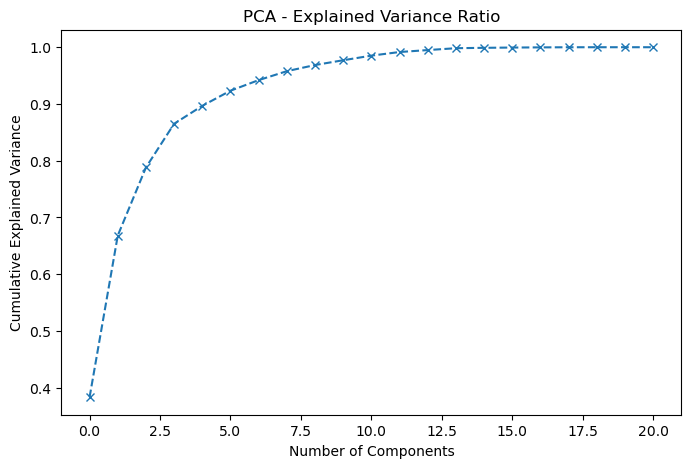

In [8]:
pca = PCA()
xPCA = pca.fit_transform(scaled)

# Scree plot to choose number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='x', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance Ratio")
plt.show()

# Choose first 4 components according to scree plot
pca = PCA(n_components=4)
transformedPCA = pca.fit_transform(scaled)

# Create PCA DataFrame
pcaDF = pd.DataFrame(transformedPCA, columns=['PC1','PC2','PC3','PC4'])


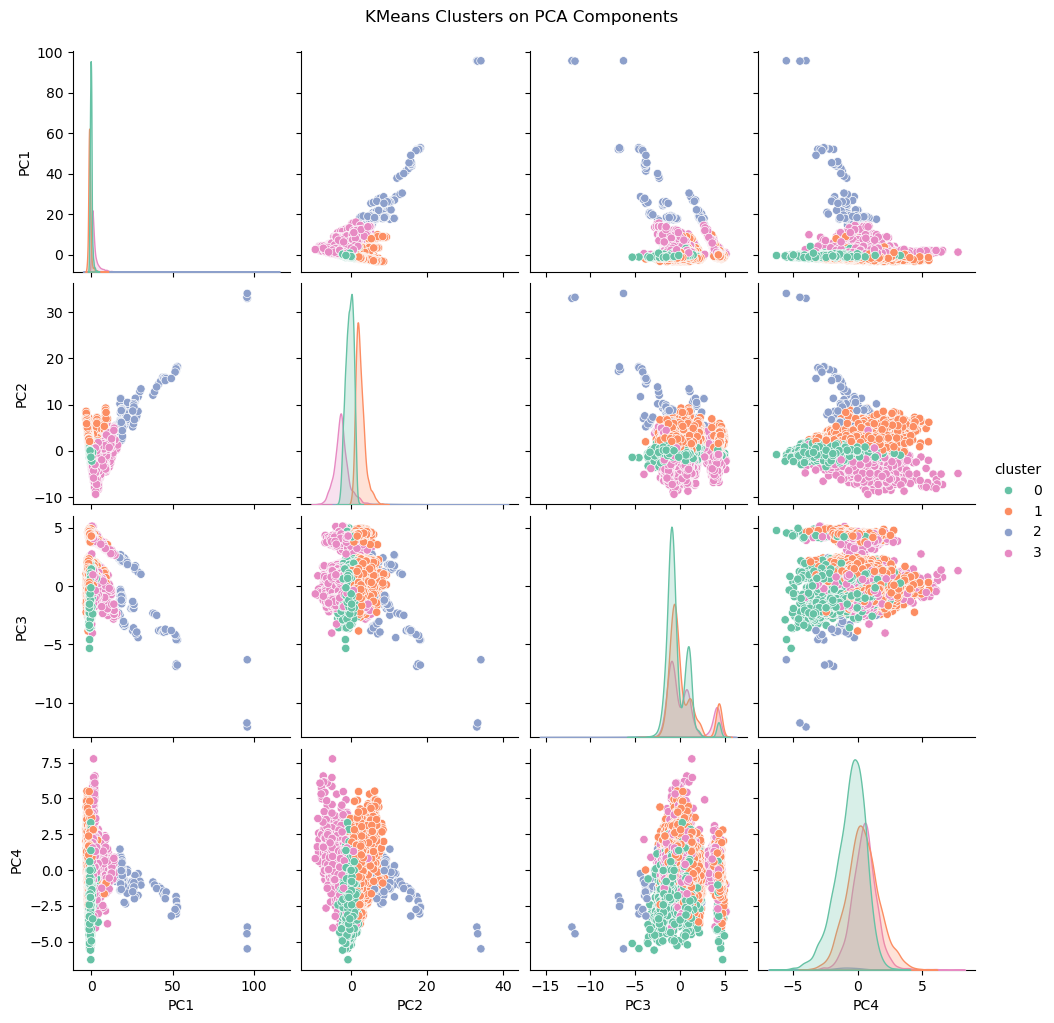

In [9]:
kmeansPCA = KMeans(n_clusters=4, init='k-means++', random_state=67)
kmeansPCA.fit(transformedPCA)

# Add cluster labels to PCA DF
pcaDF['cluster'] = kmeansPCA.labels_

# Visualize clusters in PCA space
sns.pairplot(pcaDF, vars=['PC1','PC2','PC3','PC4'], hue='cluster', palette='Set2')
plt.suptitle("KMeans Clusters on PCA Components", y=1.02)
plt.show()


In [10]:
# print data to file
pcaDF.to_csv('data/pcaDF.csv', index=False)

In [18]:
# Pipeline with scaler + KMeans
feature_cols = numericCols
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=67))
])
pipe.fit(subData[feature_cols])

# Extract labels and centroids
subData['cluster'] = pipe['kmeans'].labels_
centroids_scaled = pipe['kmeans'].cluster_centers_
centroids_original = pipe['scaler'].inverse_transform(centroids_scaled)

# Centroids DataFrame
pd.set_option('display.max_columns', None)
cent_df = pd.DataFrame(centroids_original, columns=feature_cols)

cent_df.T


,0,1,2,3
Food_Insecurity_Rate,0.167850,1.574783e-01,0.119038,1.499780e-01
Num_Food_Insecure_Persons,6101.586627,8.133552e+05,8765.074611,1.537023e+05
Low_Threshold_State,1.421874,1.630435e+00,1.465052,1.614172e+00
High_Threshold_State,1.861138,1.863043e+00,1.862933,1.893413e+00
Pct_FI_Below_Low_Threshold,0.656225,6.733478e-01,0.511773,5.861896e-01
Pct_FI_Between_Thresholds,0.140824,5.678261e-02,0.126515,7.681836e-02
Pct_FI_Above_High_Threshold,0.202954,2.699130e-01,0.361710,3.369780e-01
Child_Food_Insecurity_Rate,0.251171,2.238261e-01,0.183032,2.071098e-01
Num_Food_Insecure_Children,2119.917806,2.952226e+05,3094.727461,5.191236e+04
Pct_FI_Children_Below_185FPL,0.799405,6.980000e-01,0.647182,6.373912e-01


In [19]:
merged = pd.merge(data, subData, on=numericCols)

merged.to_csv('data/data_w_clusters.csv', index=False)

In [14]:
print(len(subData), len(merged))

21002 21002


In [15]:
merged['cluster'].value_counts()

cluster
0    20895
1      107
Name: count, dtype: int64

In [17]:
subData['cluster'].value_counts()

cluster
0    20895
1      107
Name: count, dtype: int64

## Cluster Analysis

The two clusters represent distinct socioeconomic and food-security profiles across the units in the dataset. Cluster 0 is characterized by substantially lower absolute counts of food-insecure individuals and households, lower total population and household totals, and generally lower poverty-related burdens. For example, the centroid for Num_Food_Insecure_Persons (~9,600), POP_BELOW_POVERTY (~9,800), and HOUSEHOLDS_TOTAL (~25,700) suggests smaller, less densely populated communities with relatively moderated levels of economic hardship. The food insecurity rate (~0.145) and child food insecurity rate (~0.219) are meaningful but not extreme, and median household income (~$46,400) is modest yet notably higher than typical high-poverty geographies. Overall, Cluster 0 represents moderately food-insecure, lower-population regions with more stable economic indicators.

In contrast, Cluster 1 reflects a dramatically different profile, with an order-of-magnitude increase in population and economic strain. These areas exhibit extremely high counts of food-insecure persons (~425,000), food-insecure children (~150,000), and households receiving SNAP (~121,000). Poverty and unemployment burdens are also substantially higher in absolute size, and median household income (~$54,200) is slightly higher than Cluster 0 but does not compensate for the much larger populations living below poverty. Interestingly, the rates of food insecurity and child food insecurity are similar to those of Cluster 0, but the total scale of affected individuals is vastly larger. Thus, Cluster 1 captures high-population, high-need metropolitan or regional centers where structural poverty affects a far larger volume of residents, even when rate-based indicators appear comparable.

Taken together, these clusters differentiate not merely by intensity of food insecurity in percentage terms, but by structural magnitude—Cluster 0 represents smaller, moderately burdened communities, whereas Cluster 1 captures large-scale, high-need population centers where social assistance demand, economic vulnerability, and food insecurity exist at a substantially greater scale. This distinction is especially relevant for resource allocation: policies optimized for Cluster 1 must address volume and infrastructure capacity, whereas interventions for Cluster 0 may focus on rural access, localized service gaps, and targeted support.

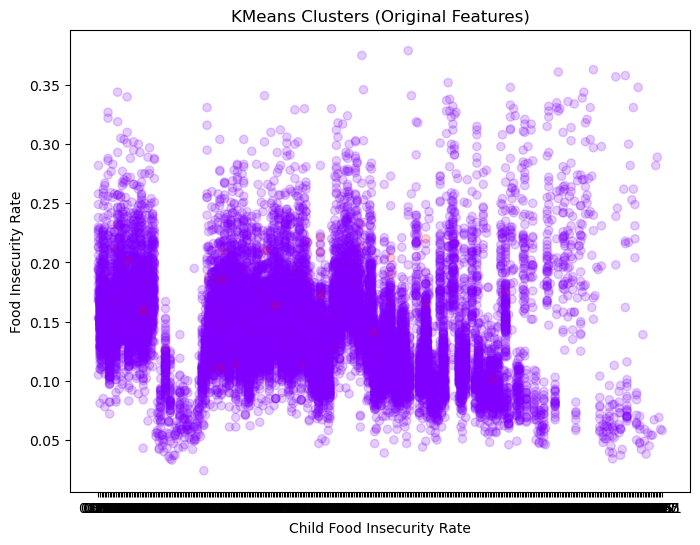

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(subData['Child_Food_Insecurity_Rate'], 
            subData['Food_Insecurity_Rate'], 
            c=subData['cluster'].astype(int), cmap='rainbow', alpha=0.2)
plt.xlabel("Child Food Insecurity Rate")
plt.ylabel("Food Insecurity Rate")
plt.title("KMeans Clusters (Original Features)")
plt.show()


In [23]:
K_values = list(range(1,15))
wcss = []
for k in K_values:
    pipe.set_params(kmeans__n_clusters=k)
    pipe.fit(subData[feature_cols])
    wcss.append(pipe['kmeans'].inertia_)

fig = px.line(x=K_values, y=wcss, markers=True,
              title="Elbow Plot",
              labels={"x":"Number of Clusters", "y":"WCSS"})
fig.show()


In [24]:
sil_scores = []
K_values_sil = list(range(2,15))
for k in K_values_sil:
    pipe.set_params(kmeans__n_clusters=k)
    pipe.fit(subData[feature_cols])
    labels = pipe['kmeans'].labels_
    sil_scores.append(silhouette_score(subData[feature_cols], labels))

fig = px.line(x=K_values_sil, y=sil_scores, markers=True,
              title="Silhouette Scores",
              labels={"x":"Number of Clusters", "y":"Silhouette Score"})
fig.show()


In [30]:
def predict_kmeans_cluster(new_row, pipeline, feature_cols):
    """
    Predict KMeans cluster for a new row using an existing pipeline.

    Parameters:
    new_row : dict
        Dictionary of feature values (keys must match feature_cols)
    pipeline : sklearn.pipeline.Pipeline
        Fitted pipeline
    feature_cols : list
        List of column names used in fitting

    Returns:
    cluster_label : int
    """
    df = pd.DataFrame([new_row], columns=feature_cols)
    return pipeline.predict(df)[0]


In [31]:
fake_row = {
    "Food_Insecurity_Rate": .125,
    "Num_Food_Insecure_Persons": 15000,
    "Low_Threshold_State": .08,
    "High_Threshold_State": .2,
    "Pct_FI_Below_Low_Threshold": .25,
    "Pct_FI_Between_Thresholds": .5,
    "Pct_FI_Above_High_Threshold": .25,
    "Child_Food_Insecurity_Rate": .15,
    "Num_Food_Insecure_Children": 5000,
    "Pct_FI_Children_Below_185FPL": .6,
    "Pct_FI_Children_Above_185FPL": .4,
    "MEDIAN_HOUSEHOLD_INCOME": 55000,
    "POP_POVERTY_DETERMINED": 100000,
    "POP_BELOW_POVERTY": 12000,
    "POP_16_PLUS": 80000,
    "POP_UNEMPLOYED": 5000,
    "HOUSEHOLDS_TOTAL": 40000,
    "HOUSEHOLDS_SNAP": 10000,
    "POVERTY_RATE": .12,
    "UNEMPLOYMENT_RATE": .06,
    "SNAP_RECEIPT_RATE": .25
}

predicted_cluster = predict_kmeans_cluster(fake_row, pipe, feature_cols)
print("Predicted cluster:", predicted_cluster)

Predicted cluster: 0
